In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
bd = pd.read_csv("dataset.csv")

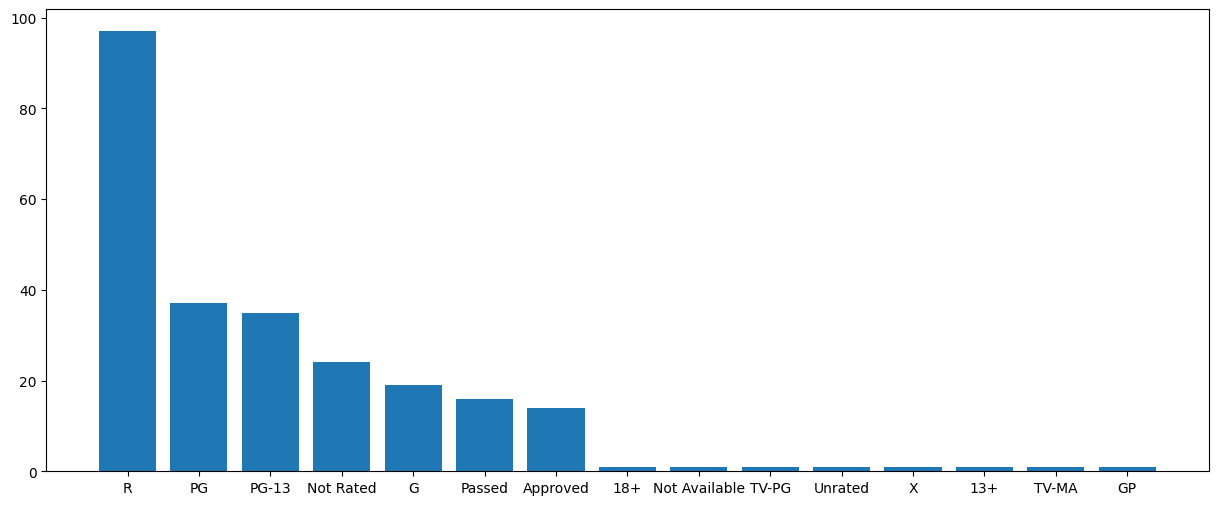

In [17]:
plt.figure(figsize=(15,6))
plt.bar(bd['certificate'].value_counts().index, bd['certificate'].value_counts().values);